# Customer Sentiment
### Evolution of customer sentiment among the year

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.patches as mpatches

# Study data files
customer = "consumer_sentiment.csv"

# Read the file data
customer_df = pd.read_csv(customer)
customer_df

,Date,Good Time<br>Prices are Low,Good Time<br>Prices will increase,Good Time<br>Interest rates low,Good Time<br>Rising interest rates,Good Time<br>Times good,Good Time<br>Fuel Efficiency,Bad Time<br>Prices High,Bad Time<br>Interest rates high,Bad Time<br>Can't Afford,Bad Time<br>Uncertain Future,Bad Time<br>Gas Prices,Bad Time<br>Poor Selection,Relative: prices,Relative: rates
0,2020-10-31,35.0,1.0,24.0,0.0,7.0,0.0,12.0,4.0,14.0,13.0,0.0,1.0,23.0,20.0
1,2020-09-30,37.0,3.0,25.0,0.0,7.0,1.0,11.0,2.0,10.0,14.0,0.0,1.0,26.0,23.0
2,2020-08-31,40.0,1.0,25.0,0.0,5.0,0.0,10.0,5.0,12.0,18.0,0.0,2.0,30.0,20.0
3,2020-07-31,43.0,1.0,22.0,0.0,4.0,0.0,10.0,6.0,12.0,18.0,0.0,1.0,33.0,16.0
4,2020-06-30,49.0,2.0,28.0,0.0,4.0,0.0,6.0,4.0,10.0,15.0,0.0,1.0,43.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,1978-06-30,7.0,39.0,1.0,1.0,4.0,3.0,24.0,4.0,1.0,1.0,1.0,11.0,-17.0,-3.0
509,1978-05-31,6.0,33.0,1.0,1.0,3.0,3.0,23.0,3.0,2.0,0.0,1.0,8.0,-17.0,-2.0
510,1978-04-30,7.0,36.0,1.0,1.0,3.0,3.0,22.0,2.0,3.0,0.0,2.0,10.0,-15.0,-1.0
511,1978-03-31,12.0,34.0,0.0,2.0,2.0,3.0,20.0,2.0,4.0,1.0,1.0,8.0,-8.0,-2.0


In [38]:
# Remove unnecessary columns from source dataframe
customer_df = customer_df.drop(['Good Time<br>Prices are Low','Good Time<br>Prices will increase',
                                'Good Time<br>Interest rates low','Good Time<br>Rising interest rates',
                                'Good Time<br>Fuel Efficiency', 'Bad Time<br>Prices High', 'Bad Time<br>Interest rates high',
                                "Bad Time<br>Can't Afford",'Bad Time<br>Gas Prices','Bad Time<br>Poor Selection','Relative: prices',
                                'Relative: rates'],axis=1)
customer_df

,Date,Good Time<br>Times good,Bad Time<br>Uncertain Future
0,2020-10-31,7.0,13.0
1,2020-09-30,7.0,14.0
2,2020-08-31,5.0,18.0
3,2020-07-31,4.0,18.0
4,2020-06-30,4.0,15.0
...,...,...,...
508,1978-06-30,4.0,1.0
509,1978-05-31,3.0,0.0
510,1978-04-30,3.0,0.0
511,1978-03-31,2.0,1.0


In [52]:
# Remove data beyond the end of the 3Q 2020 starting at 2019-01-01
customer_df = customer_df[customer_df['Date'] >= '2019-01-01']
customer_df = customer_df[customer_df['Date'] <= '2020-10-01']
customer_df

,Date,Good Time<br>Times good,Bad Time<br>Uncertain Future
21,2019-01-31,12.0,6.0
20,2019-02-28,14.0,6.0
19,2019-03-31,17.0,3.0
18,2019-04-30,20.0,3.0
17,2019-05-31,16.0,4.0
16,2019-06-30,19.0,4.0
15,2019-07-31,18.0,5.0
14,2019-08-31,14.0,4.0
13,2019-09-30,18.0,5.0
12,2019-10-31,16.0,5.0


In [53]:
#Sort values from 2019-01-01 to 2020-10-01
customer_df = customer_df.sort_values('Date')
customer_df

,Date,Good Time<br>Times good,Bad Time<br>Uncertain Future
21,2019-01-31,12.0,6.0
20,2019-02-28,14.0,6.0
19,2019-03-31,17.0,3.0
18,2019-04-30,20.0,3.0
17,2019-05-31,16.0,4.0
16,2019-06-30,19.0,4.0
15,2019-07-31,18.0,5.0
14,2019-08-31,14.0,4.0
13,2019-09-30,18.0,5.0
12,2019-10-31,16.0,5.0


In [62]:
# Historical points as markers
# Group by Date to create df for historical markers.
CSI = customer_df.groupby(['Date']).sum()

dates = ["2020-03-31","2020-05-31"]
def find_loc(CSI, dates):
    marks = []
    for date in dates:
        marks.append(UEI.index.get_loc(date))
    return marks

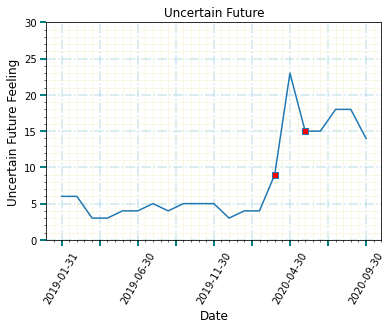

In [63]:
#Bad Time<br>Uncertain Future

# Line chart selection
customer_df.plot.line(x='Date', y='Bad Time<br>Uncertain Future', legend = False, rot=60, title="Uncertain Future",
                      markevery=find_loc(CSI, dates), marker='s', markerfacecolor='red')


# Sets the y limits
plt.ylim(0, 30)

# Provides labels
plt.xlabel("Date", fontsize=12)
plt.ylabel("Uncertain Future Feeling", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
#plt.savefig('Images/Interest Rates.png')

plt.show(block=True)

### Additional Comparation 

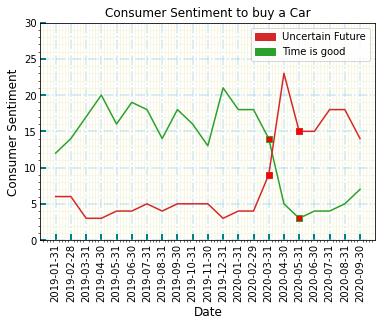

In [64]:
#Compare the trend between types of interest rates
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line1 = ax.plot(customer_df['Date'], customer_df["Good Time<br>Times good"], color='tab:green',
                markevery=find_loc(UEI, dates), marker='s', markerfacecolor='red')
line2 = ax.plot(customer_df['Date'], customer_df['Bad Time<br>Uncertain Future'], color='tab:red',
                markevery=find_loc(CSI, dates), marker='s', markerfacecolor='red')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
line1
line2

# Sets the y limits
plt.ylim(0, 30)

# Provides labels
plt.title("Consumer Sentiment to buy a Car")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Consumer Sentiment", fontsize=12)

red_patch = mpatches.Patch(color='tab:red', label='Uncertain Future')
green_patch = mpatches.Patch(color='tab:green', label='Time is good')
plt.legend(handles=[red_patch,green_patch])



plt.tick_params(axis='both', direction='in', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)
plt.xticks(rotation=90)
# Save the figure as .png
#plt.savefig('Images/Interest Rates.png')

#plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.show(block=True)

In [57]:
# Correlation between two datased using pearson -r 
correlation = round(st.pearsonr(customer_df['Good Time<br>Times good'],customer_df['Bad Time<br>Uncertain Future'])[0],2)
print(f"The correlation is {correlation}")


The correlation is -0.92


In [61]:
if correlation == 0:
    print (f"The correlation is exact")
elif correlation <= -0.8:
    print(f'There is an inverse relation')
elif correlation >= 0.8:
    print(f'There is no correlation at all')
else:
    print(f'There is some correlation')

There is an inverse relation
